<a href="https://colab.research.google.com/github/hanieranjbar/snappfood_task/blob/main/1stpythontaskEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

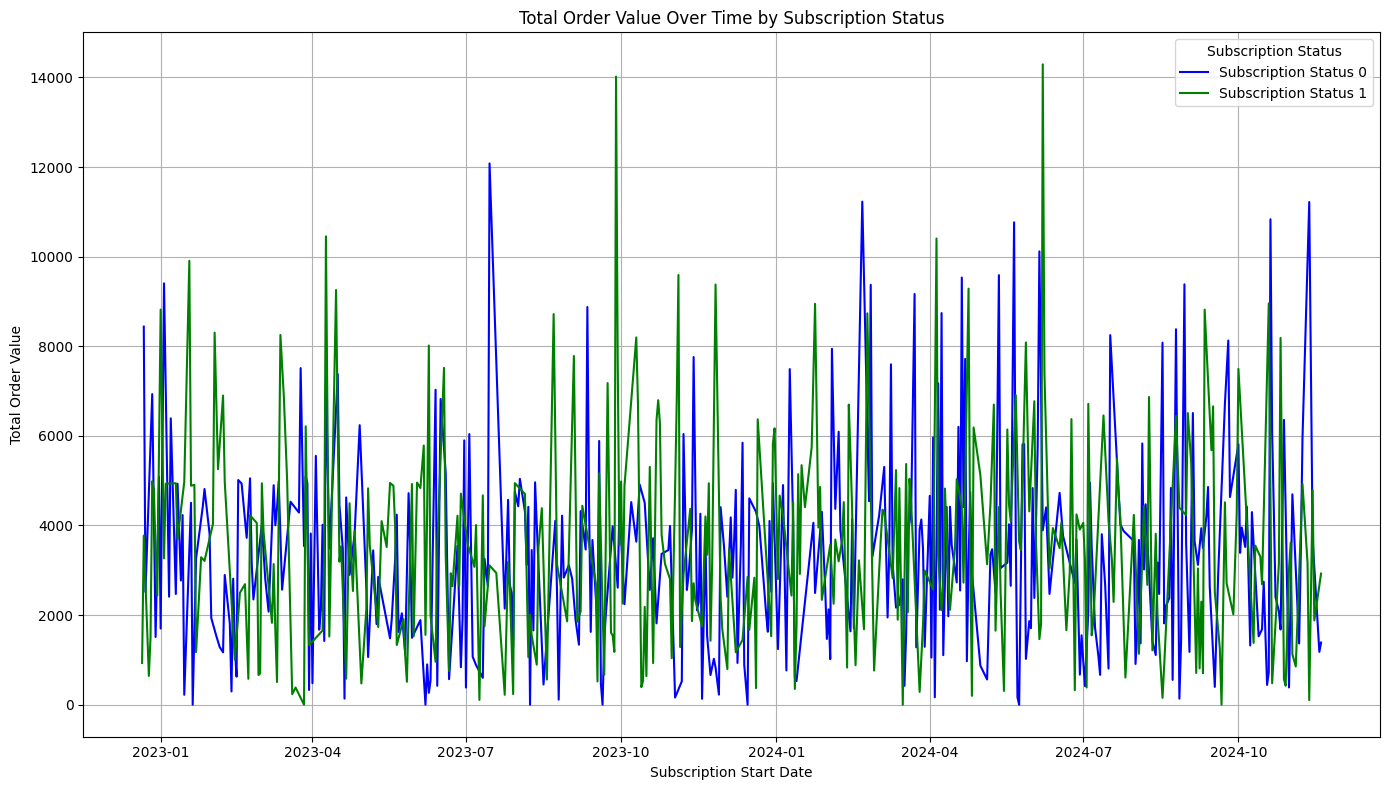

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "foodpro_users.csv"
data = pd.read_csv(file_path)

# Ensure subscription_start is in datetime format
data['subscription_start'] = pd.to_datetime(data['subscription_start'])

# Filter data for subscription_status = 0 and 1
data_0 = data[data['subscription_status'] == 0]
data_1 = data[data['subscription_status'] == 1]

# Group by subscription_start and calculate metrics for status 0
metrics_0 = data_0.groupby('subscription_start').agg({
    'total_orders': 'sum',
    'total_order_value': 'sum'
}).reset_index()

# Group by subscription_start and calculate metrics for status 1
metrics_1 = data_1.groupby('subscription_start').agg({
    'total_orders': 'sum',
    'total_order_value': 'sum'
}).reset_index()

# Plot the data
plt.figure(figsize=(14, 8))

# Plot for subscription_status = 0
sns.lineplot(
    data=metrics_0,
    x='subscription_start',
    y='total_order_value',
    label='Subscription Status 0',
    color='blue'
)

# Plot for subscription_status = 1
sns.lineplot(
    data=metrics_1,
    x='subscription_start',
    y='total_order_value',
    label='Subscription Status 1',
    color='green'
)

# Add labels and title
plt.xlabel('Subscription Start Date')
plt.ylabel('Total Order Value')
plt.title('Total Order Value Over Time by Subscription Status')
plt.legend(title='Subscription Status')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


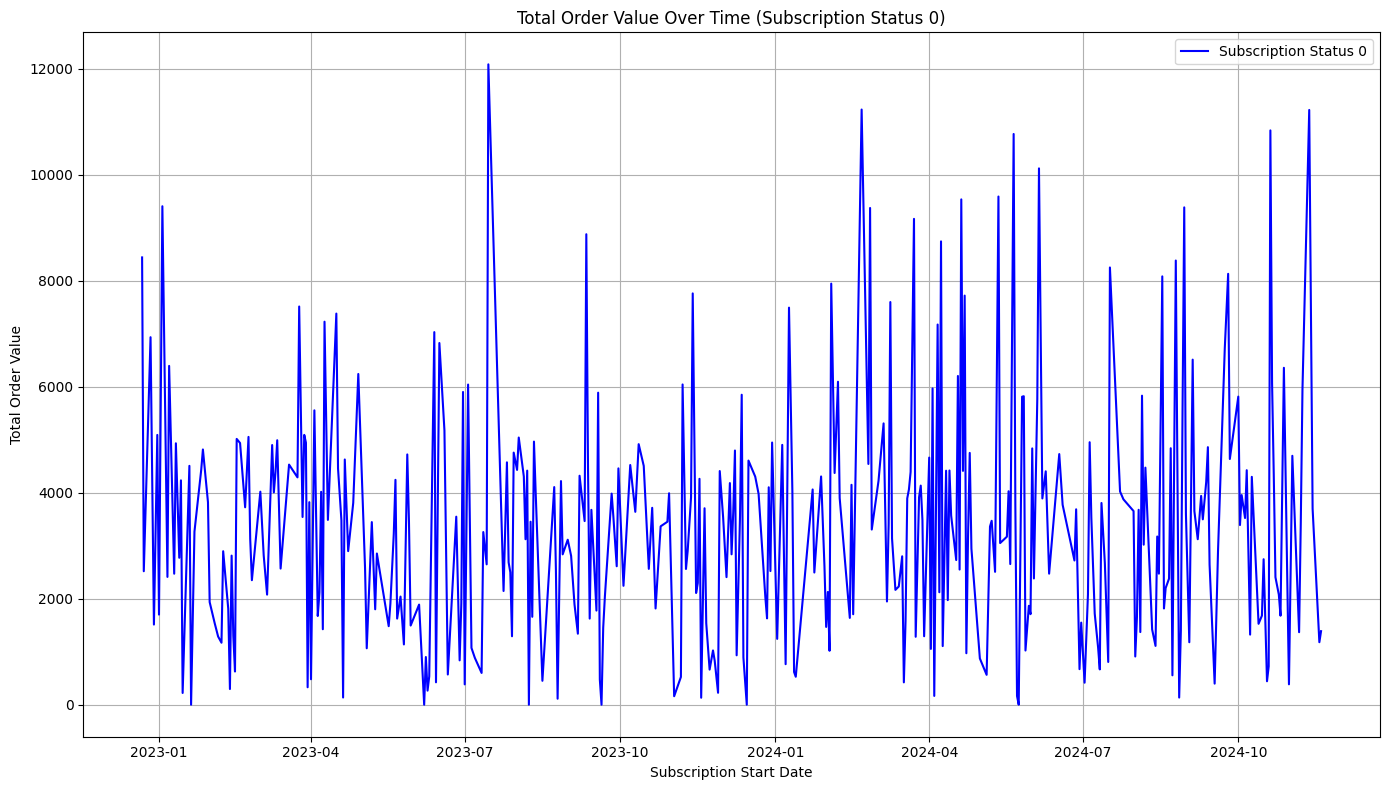

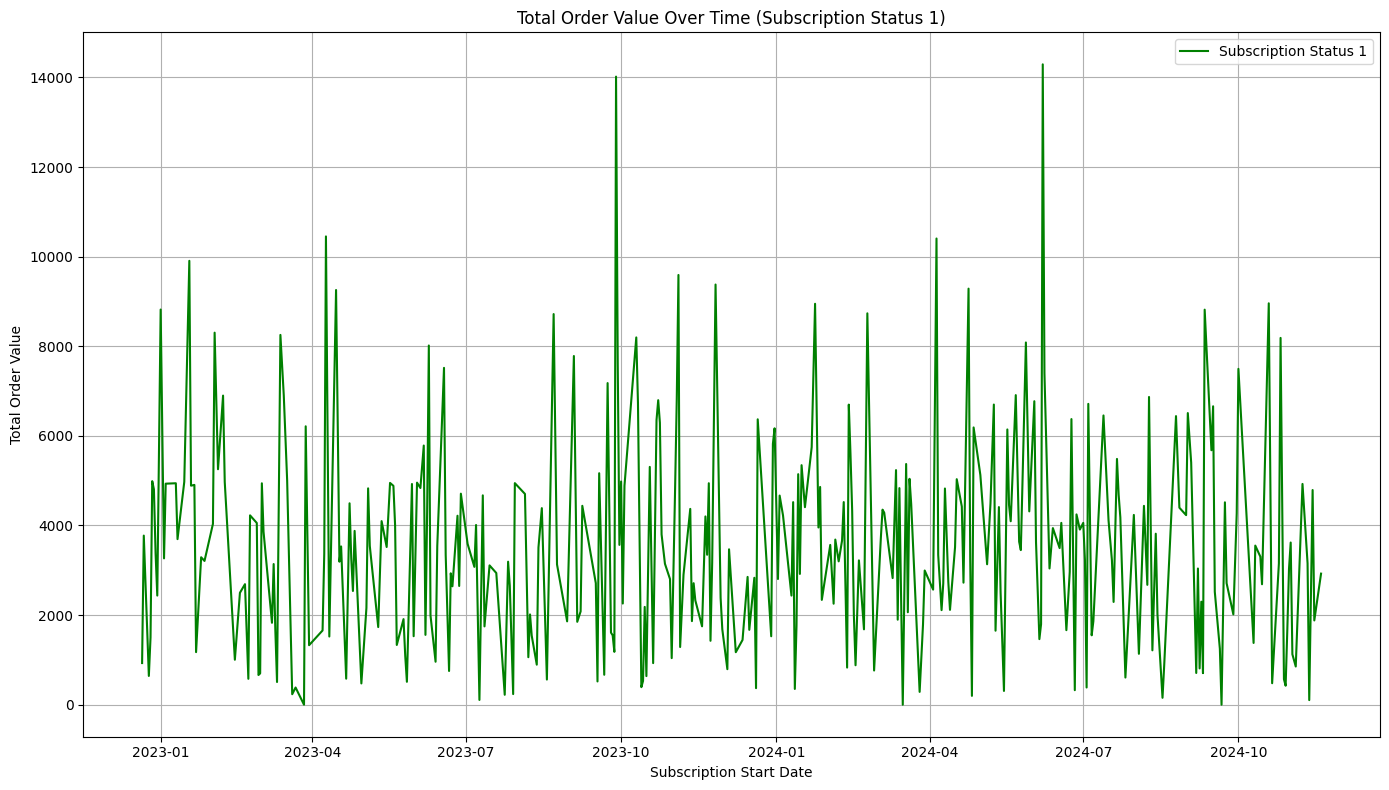

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "foodpro_users.csv"
data = pd.read_csv(file_path)

data['subscription_start'] = pd.to_datetime(data['subscription_start'])

# Filter data for subscription_status = 0 and 1
data_0 = data[data['subscription_status'] == 0]
data_1 = data[data['subscription_status'] == 1]

# Group by subscription_start and calculate metrics for status 0
metrics_0 = data_0.groupby('subscription_start').agg({
    'total_orders': 'sum',
    'total_order_value': 'sum'
}).reset_index()

# Group by subscription_start and calculate metrics for status 1
metrics_1 = data_1.groupby('subscription_start').agg({
    'total_orders': 'sum',
    'total_order_value': 'sum'
}).reset_index()

# Plot the data for subscription_status = 0
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=metrics_0,
    x='subscription_start',
    y='total_order_value',
    label='Subscription Status 0',
    color='blue'
)

# Add labels and title for subscription_status = 0
plt.xlabel('Subscription Start Date')
plt.ylabel('Total Order Value')
plt.title('Total Order Value Over Time (Subscription Status 0)')
plt.grid(True)

# Show the plot for subscription_status = 0
plt.tight_layout()
plt.show()

# Plot the data for subscription_status = 1
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=metrics_1,
    x='subscription_start',
    y='total_order_value',
    label='Subscription Status 1',
    color='green'
)

# Add labels and title for subscription_status = 1
plt.xlabel('Subscription Start Date')
plt.ylabel('Total Order Value')
plt.title('Total Order Value Over Time (Subscription Status 1)')
plt.grid(True)

# Show the plot for subscription_status = 1
plt.tight_layout()
plt.show()


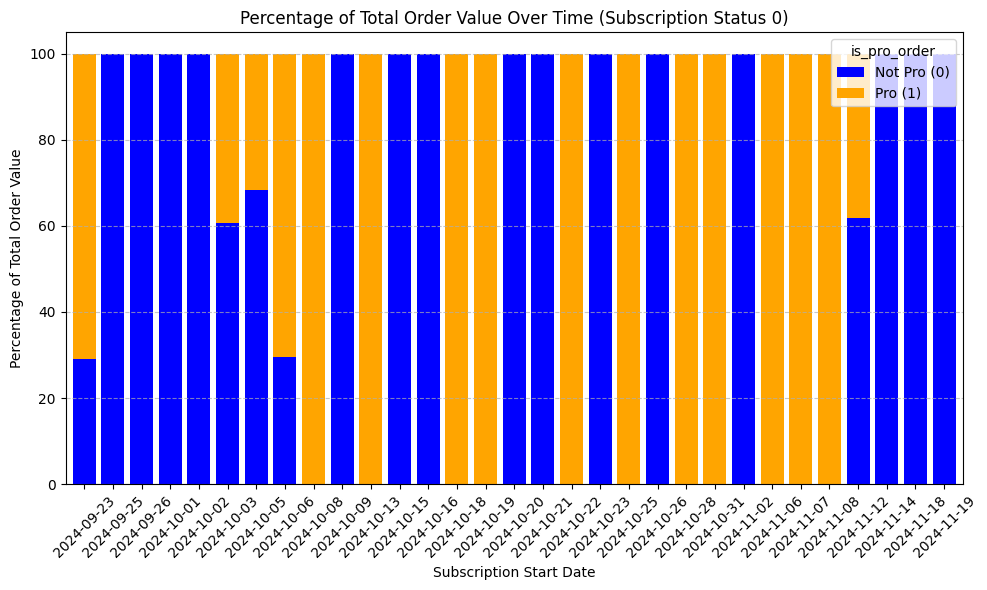

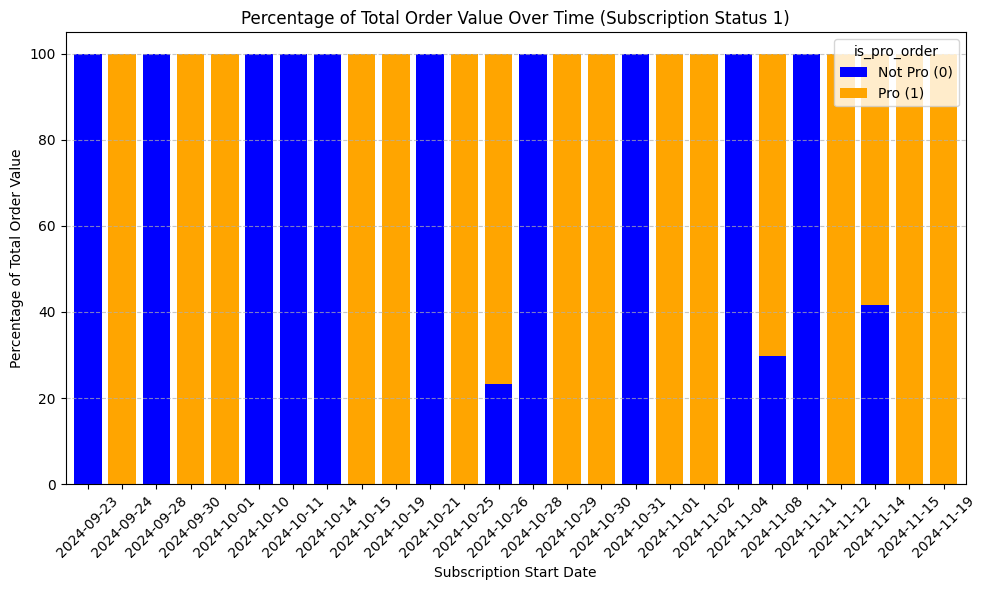

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "foodpro_users.csv"
data = pd.read_csv(file_path)

data['subscription_start'] = pd.to_datetime(data['subscription_start'])

three_months_ago = pd.Timestamp.now() - pd.DateOffset(months=3)
data = data[data['subscription_start'] >= three_months_ago]

data['subscription_start'] = data['subscription_start'].dt.strftime('%Y-%m-%d')

data_0 = data[data['subscription_status'] == 0]
data_1 = data[data['subscription_status'] == 1]

data_0_grouped = data_0.groupby(['subscription_start', 'is_pro_order'])['total_order_value'].sum().reset_index()
data_0_total = data_0_grouped.groupby('subscription_start')['total_order_value'].transform('sum')
data_0_grouped['percentage'] = (data_0_grouped['total_order_value'] / data_0_total) * 100

data_1_grouped = data_1.groupby(['subscription_start', 'is_pro_order'])['total_order_value'].sum().reset_index()
data_1_total = data_1_grouped.groupby('subscription_start')['total_order_value'].transform('sum')
data_1_grouped['percentage'] = (data_1_grouped['total_order_value'] / data_1_total) * 100

metrics_0_pivot = data_0_grouped.pivot(index='subscription_start', columns='is_pro_order', values='percentage').fillna(0)
metrics_1_pivot = data_1_grouped.pivot(index='subscription_start', columns='is_pro_order', values='percentage').fillna(0)

plt.figure(figsize=(10, 6))
metrics_0_pivot.plot(
    kind='bar',
    stacked=True,
    color=['blue', 'orange'],
    figsize=(10, 6),
    width=0.8,
    ax=plt.gca()
)
plt.title('Percentage of Total Order Value Over Time (Subscription Status 0)')
plt.xlabel('Subscription Start Date')
plt.ylabel('Percentage of Total Order Value')
plt.legend(title='is_pro_order', labels=['Not Pro (0)', 'Pro (1)'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
metrics_1_pivot.plot(
    kind='bar',
    stacked=True,
    color=['blue', 'orange'],
    figsize=(10, 6),
    width=0.8,
    ax=plt.gca()
)
plt.title('Percentage of Total Order Value Over Time (Subscription Status 1)')
plt.xlabel('Subscription Start Date')
plt.ylabel('Percentage of Total Order Value')
plt.legend(title='is_pro_order', labels=['Not Pro (0)', 'Pro (1)'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


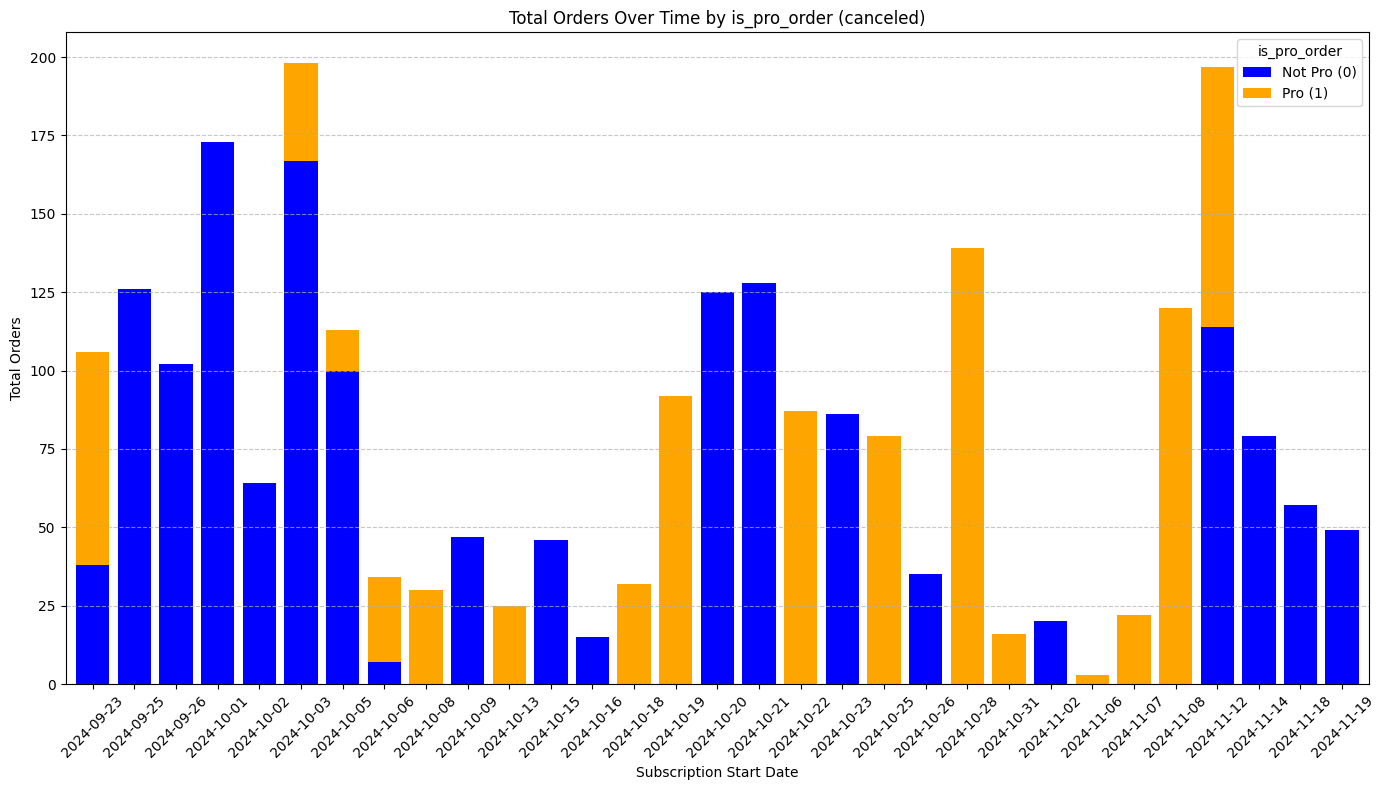

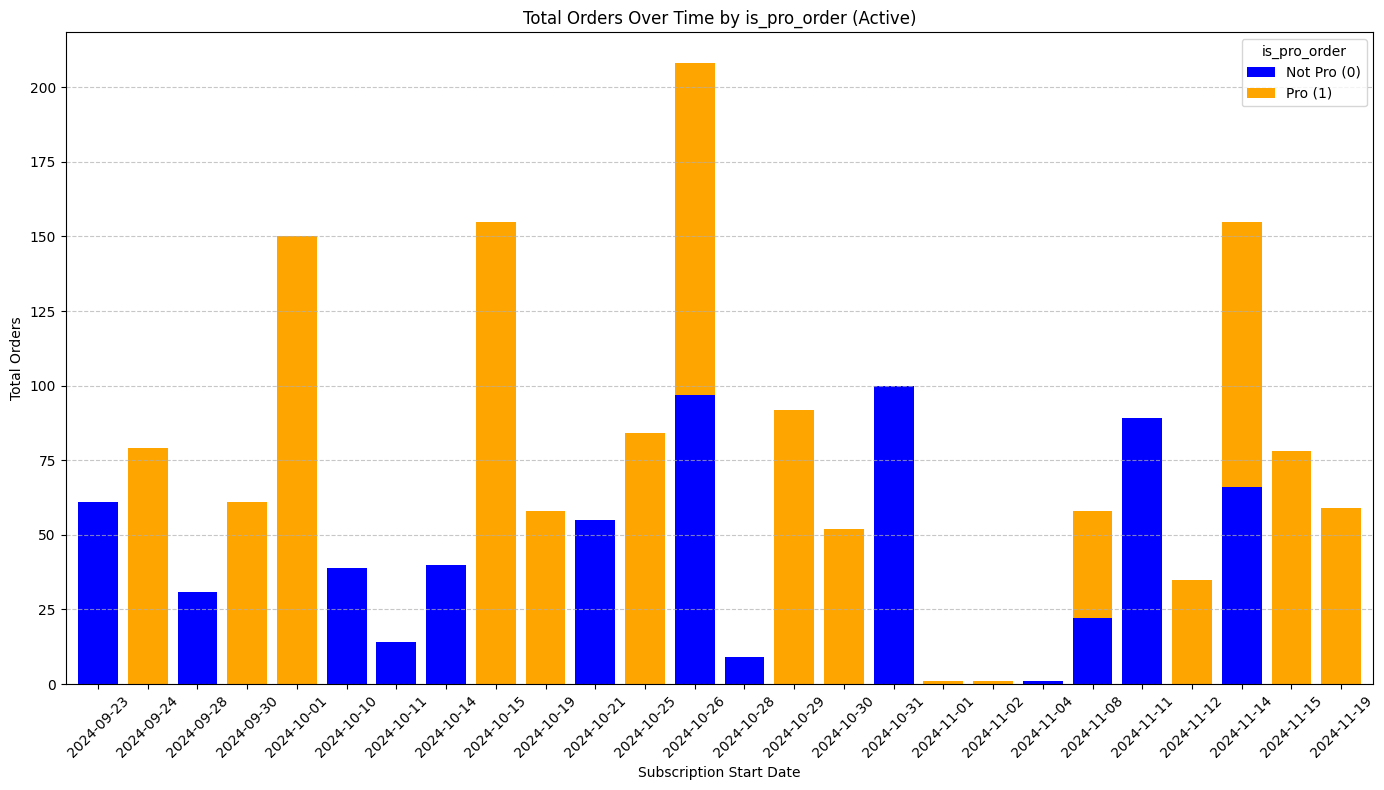

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "foodpro_users.csv"
data = pd.read_csv(file_path)

data['subscription_start'] = pd.to_datetime(data['subscription_start'])

three_months_ago = pd.Timestamp.now() - pd.DateOffset(months=3)
data = data[data['subscription_start'] >= three_months_ago]

data['subscription_start'] = data['subscription_start'].dt.strftime('%Y-%m-%d')

data_0 = data[data['subscription_status'] == 0]
data_1 = data[data['subscription_status'] == 1]

metrics_0 = data_0.groupby(['subscription_start', 'is_pro_order']).agg({
    'total_orders': 'sum'
}).reset_index()

metrics_1 = data_1.groupby(['subscription_start', 'is_pro_order']).agg({
    'total_orders': 'sum'
}).reset_index()

metrics_0_pivot = metrics_0.pivot(index='subscription_start', columns='is_pro_order', values='total_orders').fillna(0)
metrics_1_pivot = metrics_1.pivot(index='subscription_start', columns='is_pro_order', values='total_orders').fillna(0)

plt.figure(figsize=(14, 8))
metrics_0_pivot.plot(
    kind='bar',
    stacked=True,
    color=['blue', 'orange'],
    figsize=(14, 8),
    width=0.8,
    ax=plt.gca()
)
plt.title('Total Orders Over Time by is_pro_order (canceled)')
plt.xlabel('Subscription Start Date')
plt.ylabel('Total Orders')
plt.legend(title='is_pro_order', labels=['Not Pro (0)', 'Pro (1)'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
metrics_1_pivot.plot(
    kind='bar',
    stacked=True,
    color=['blue', 'orange'],
    figsize=(14, 8),
    width=0.8,
    ax=plt.gca()
)
plt.title('Total Orders Over Time by is_pro_order (Active)')
plt.xlabel('Subscription Start Date')
plt.ylabel('Total Orders')
plt.legend(title='is_pro_order', labels=['Not Pro (0)', 'Pro (1)'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


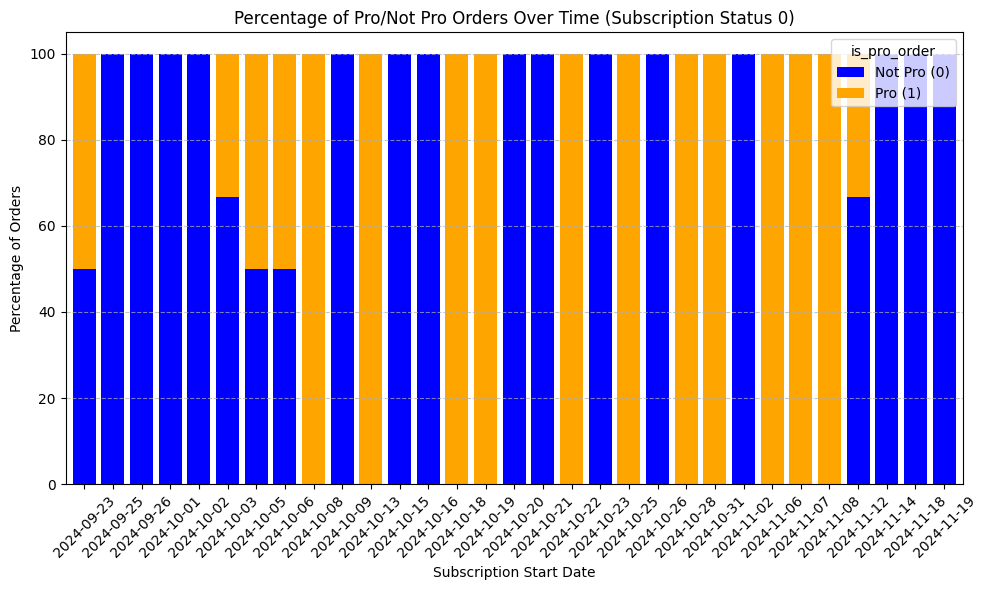

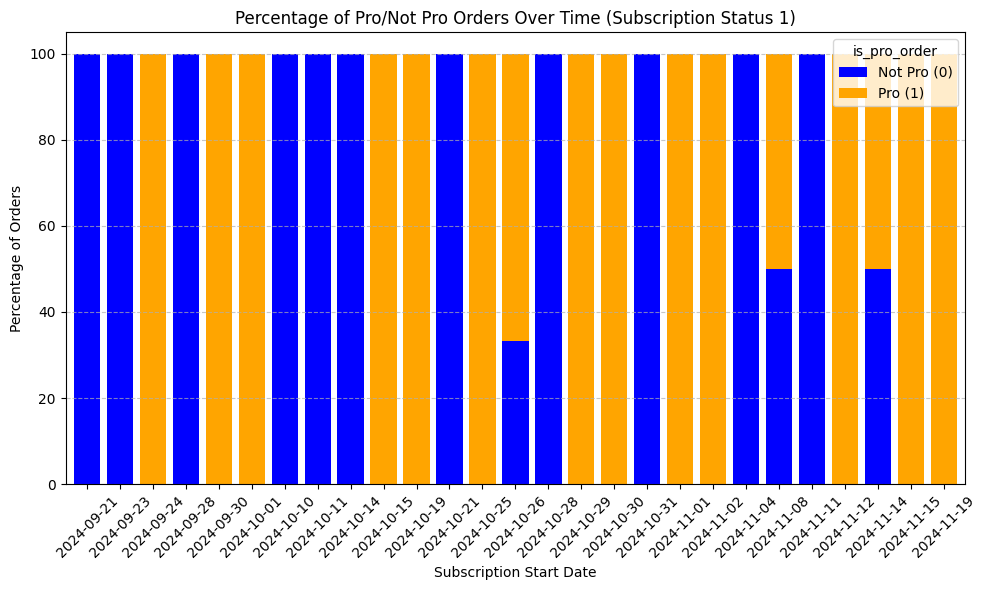

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "foodpro_users.csv"
data = pd.read_csv(file_path)

# Ensure subscription_start is in datetime format
data['subscription_start'] = pd.to_datetime(data['subscription_start'])

# Filter data for the last 3 months
three_months_ago = pd.Timestamp.now() - pd.DateOffset(months=3)
data = data[data['subscription_start'] >= three_months_ago]

# Format subscription_start to yyyy-mm-dd
data['subscription_start'] = data['subscription_start'].dt.strftime('%Y-%m-%d')

# Filter data for subscription_status = 0 and 1
data_0 = data[data['subscription_status'] == 0]
data_1 = data[data['subscription_status'] == 1]

# Calculate percentage of pro and not pro orders for status 0
data_0_grouped = data_0.groupby(['subscription_start', 'is_pro_order']).size().reset_index(name='count')
data_0_total = data_0_grouped.groupby('subscription_start')['count'].transform('sum')
data_0_grouped['percentage'] = (data_0_grouped['count'] / data_0_total) * 100

# Calculate percentage of pro and not pro orders for status 1
data_1_grouped = data_1.groupby(['subscription_start', 'is_pro_order']).size().reset_index(name='count')
data_1_total = data_1_grouped.groupby('subscription_start')['count'].transform('sum')
data_1_grouped['percentage'] = (data_1_grouped['count'] / data_1_total) * 100

# Pivot data for plotting stacked bar charts
metrics_0_pivot = data_0_grouped.pivot(index='subscription_start', columns='is_pro_order', values='percentage').fillna(0)
metrics_1_pivot = data_1_grouped.pivot(index='subscription_start', columns='is_pro_order', values='percentage').fillna(0)

# Plot for subscription_status = 0
plt.figure(figsize=(10, 6))
metrics_0_pivot.plot(
    kind='bar',
    stacked=True,
    color=['blue', 'orange'],
    figsize=(10, 6),
    width=0.8,
    ax=plt.gca()
)
plt.title('Percentage of Pro/Not Pro Orders Over Time (Subscription Status 0)')
plt.xlabel('Subscription Start Date')
plt.ylabel('Percentage of Orders')
plt.legend(title='is_pro_order', labels=['Not Pro (0)', 'Pro (1)'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for subscription_status = 1
plt.figure(figsize=(10, 6))
metrics_1_pivot.plot(
    kind='bar',
    stacked=True,
    color=['blue', 'orange'],
    figsize=(10, 6),
    width=0.8,
    ax=plt.gca()
)
plt.title('Percentage of Pro/Not Pro Orders Over Time (Subscription Status 1)')
plt.xlabel('Subscription Start Date')
plt.ylabel('Percentage of Orders')
plt.legend(title='is_pro_order', labels=['Not Pro (0)', 'Pro (1)'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


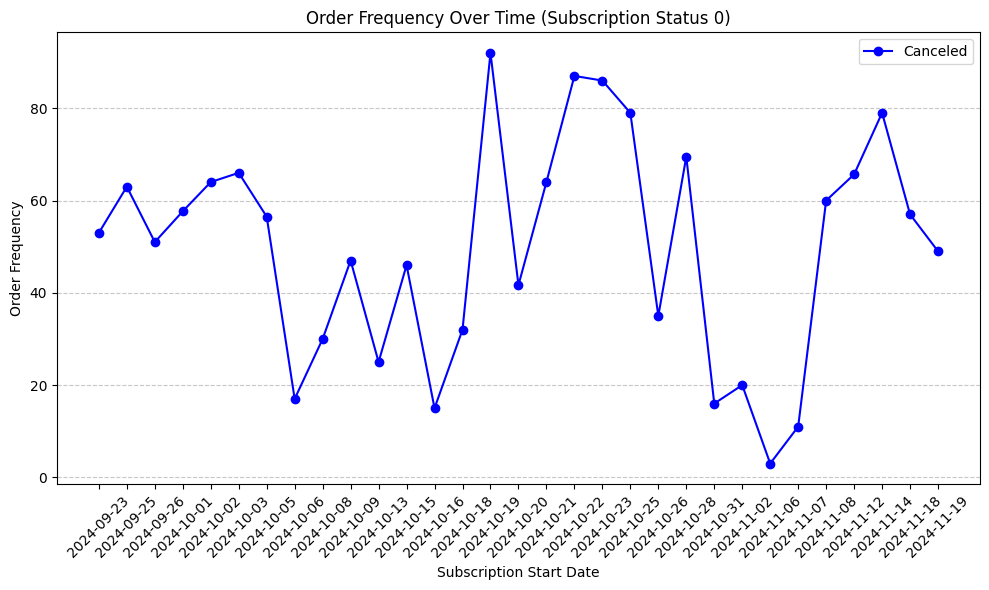

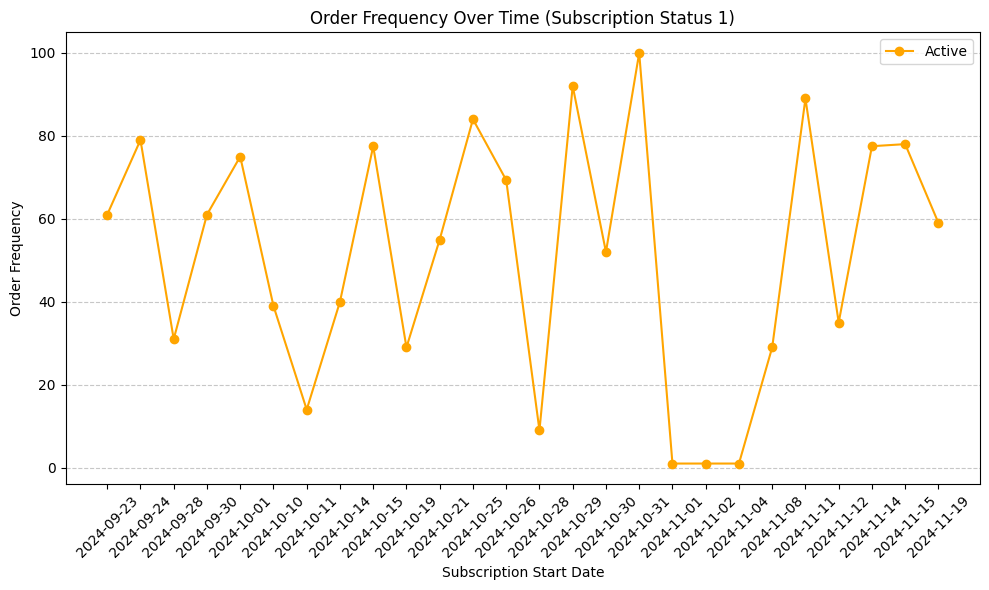

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "foodpro_users.csv"
data = pd.read_csv(file_path)

# Ensure subscription_start is in datetime format
data['subscription_start'] = pd.to_datetime(data['subscription_start'])

# Filter data for the last 3 months
three_months_ago = pd.Timestamp.now() - pd.DateOffset(months=3)
data = data[data['subscription_start'] >= three_months_ago]

# Format subscription_start to yyyy-mm-dd
data['subscription_start'] = data['subscription_start'].dt.strftime('%Y-%m-%d')

# Filter data for subscription_status = 0 and 1
data_0 = data[data['subscription_status'] == 0]
data_1 = data[data['subscription_status'] == 1]

# Calculate order frequency as total orders divided by the number of unique customers
data_0_grouped = data_0.groupby(['subscription_start']).agg(
    total_orders=('total_orders', 'sum'),
    unique_customers=('customer_id', 'nunique')
).reset_index()

data_1_grouped = data_1.groupby(['subscription_start']).agg(
    total_orders=('total_orders', 'sum'),
    unique_customers=('customer_id', 'nunique')
).reset_index()

# Calculate order frequency
data_0_grouped['order_frequency'] = data_0_grouped['total_orders'] / data_0_grouped['unique_customers']
data_1_grouped['order_frequency'] = data_1_grouped['total_orders'] / data_1_grouped['unique_customers']

# Plot for subscription_status = 0 (Canceled)
plt.figure(figsize=(10, 6))
plt.plot(data_0_grouped['subscription_start'], data_0_grouped['order_frequency'], marker='o', color='blue', label='Canceled')
plt.title('Order Frequency Over Time (Subscription Status 0)')
plt.xlabel('Subscription Start Date')
plt.ylabel('Order Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()

# Plot for subscription_status = 1 (Active)
plt.figure(figsize=(10, 6))
plt.plot(data_1_grouped['subscription_start'], data_1_grouped['order_frequency'], marker='o', color='orange', label='Active')
plt.title('Order Frequency Over Time (Subscription Status 1)')
plt.xlabel('Subscription Start Date')
plt.ylabel('Order Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()


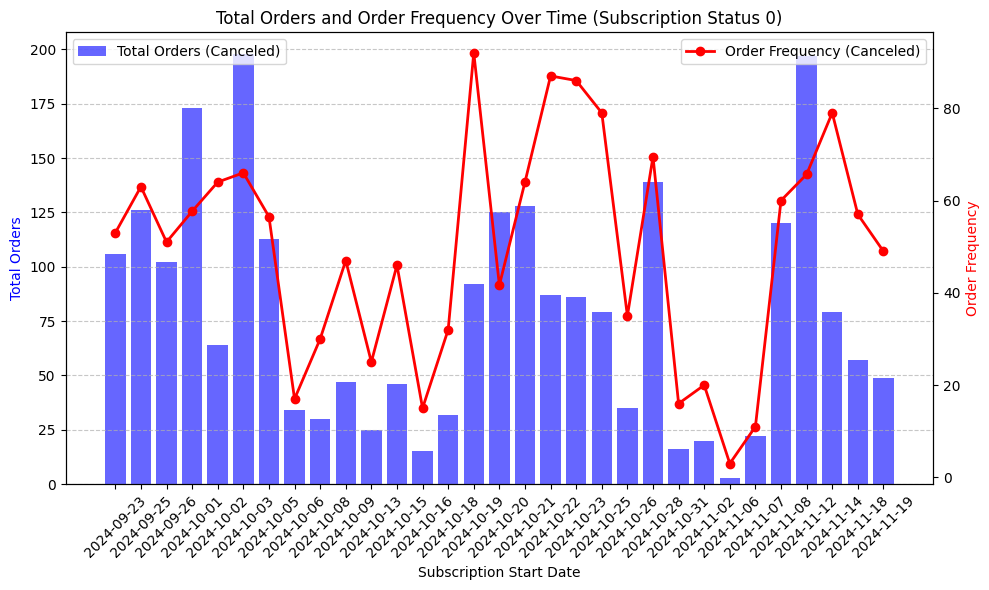

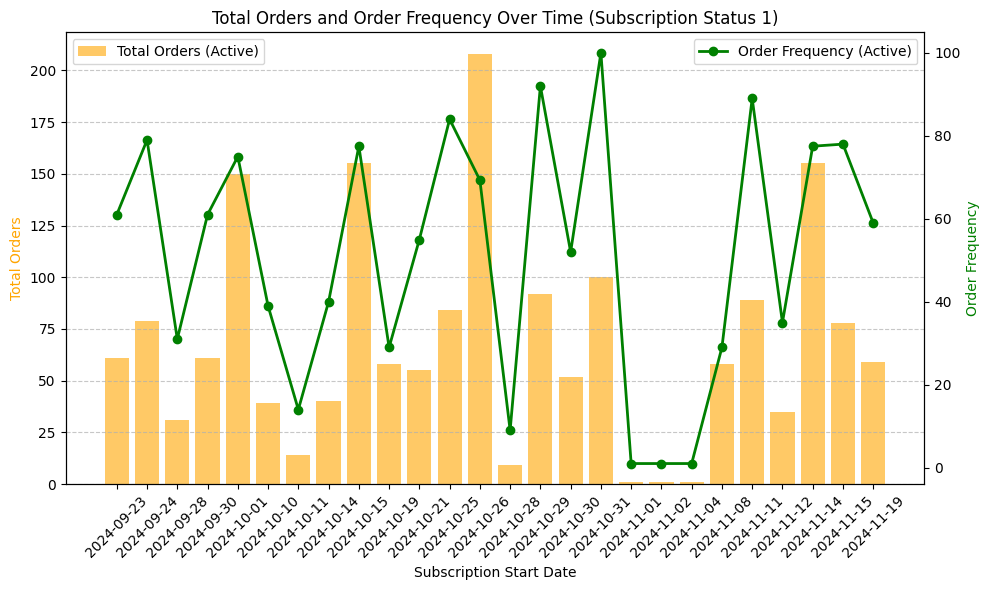

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "foodpro_users.csv"
data = pd.read_csv(file_path)

# Ensure subscription_start is in datetime format
data['subscription_start'] = pd.to_datetime(data['subscription_start'])

# Filter data for the last 3 months
three_months_ago = pd.Timestamp.now() - pd.DateOffset(months=3)
data = data[data['subscription_start'] >= three_months_ago]

# Format subscription_start to yyyy-mm-dd
data['subscription_start'] = data['subscription_start'].dt.strftime('%Y-%m-%d')

# Filter data for subscription_status = 0 and 1
data_0 = data[data['subscription_status'] == 0]
data_1 = data[data['subscription_status'] == 1]

# Calculate order frequency as total orders divided by the number of unique customers
data_0_grouped = data_0.groupby(['subscription_start']).agg(
    total_orders=('total_orders', 'sum'),
    unique_customers=('customer_id', 'nunique')
).reset_index()

data_1_grouped = data_1.groupby(['subscription_start']).agg(
    total_orders=('total_orders', 'sum'),
    unique_customers=('customer_id', 'nunique')
).reset_index()

# Calculate order frequency
data_0_grouped['order_frequency'] = data_0_grouped['total_orders'] / data_0_grouped['unique_customers']
data_1_grouped['order_frequency'] = data_1_grouped['total_orders'] / data_1_grouped['unique_customers']

# Plot for subscription_status = 0 (Canceled)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for total orders (volume of orders)
ax1.bar(data_0_grouped['subscription_start'], data_0_grouped['total_orders'], color='blue', alpha=0.6, label='Total Orders (Canceled)', width=0.8)

# Line chart for order frequency
ax2 = ax1.twinx()
ax2.plot(data_0_grouped['subscription_start'], data_0_grouped['order_frequency'], marker='o', color='red', label='Order Frequency (Canceled)', linewidth=2)

ax1.set_title('Total Orders and Order Frequency Over Time (Subscription Status 0)')
ax1.set_xlabel('Subscription Start Date')
ax1.set_ylabel('Total Orders', color='blue')
ax2.set_ylabel('Order Frequency', color='red')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Plot for subscription_status = 1 (Active)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for total orders (volume of orders)
ax1.bar(data_1_grouped['subscription_start'], data_1_grouped['total_orders'], color='orange', alpha=0.6, label='Total Orders (Active)', width=0.8)

# Line chart for order frequency
ax2 = ax1.twinx()
ax2.plot(data_1_grouped['subscription_start'], data_1_grouped['order_frequency'], marker='o', color='green', label='Order Frequency (Active)', linewidth=2)

ax1.set_title('Total Orders and Order Frequency Over Time (Subscription Status 1)')
ax1.set_xlabel('Subscription Start Date')
ax1.set_ylabel('Total Orders', color='orange')
ax2.set_ylabel('Order Frequency', color='green')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()
